In [2]:
## import model dependencies
import os
import numpy as np
from qwak.feature_store.offline import OfflineClient
import frogml 

import qwak
from qwak.model.base import QwakModel
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import pandas as pd
from qwak import qwak_timer
from qwak.model.adapters import JsonOutputAdapter
import matplotlib.pyplot as plt


### Define Hyperparameteres

In [3]:
params = {
    'iterations': 50,
    'learning_rate': 0.2,
    'eval_metric': 'Accuracy',
    'logging_level': 'Silent',
    'use_best_model': True
}


In [4]:
### Define Model
cb = CatBoostClassifier(**params)

### Load Training Data

In [5]:
df = pd.read_csv("main/training_data.csv", index_col=0)

In [6]:
df

,timestamp,label,job,credit_amount,duration,purpose,risk
user_id,,,,,,,
e41160de-0a56-47cf-8193-a0c97fe2e752,2022-11-22 12:31:40,0,2.0,9572.0,24.0,car,bad
b0ca3ac4-5432-4c21-8251-a6ae0d3ad874,2022-11-22 12:42:58,0,2.0,6976.0,48.0,business,good
4b7af572-b249-4bae-9815-10ed3a2cd01d,2022-11-22 12:40:18,0,2.0,11666.0,18.0,domestic appliances,bad
d3b985e5-2309-48c6-9453-865aa6b26108,2022-11-22 12:33:24,0,3.0,8006.0,27.0,furniture/equipment,good
b3c16619-be7f-4deb-a9cc-b99e94de89fb,2022-11-22 12:48:21,0,3.0,3536.0,12.0,business,good
ea4882fa-8af3-4aa3-a791-8b3c159c2cf0,2022-11-22 12:50:40,0,1.0,12748.0,23.0,furniture/equipment,good
a3a2eaf9-5d8f-46dd-9cf4-9d186c973200,2022-11-22 12:40:12,1,1.0,9883.0,41.0,radio/TV,good
a8cd57ca-0199-46e3-a44e-a9d5927edd7a,2022-11-22 12:32:10,0,1.0,12834.0,9.0,car,good
8b011e21-bc59-4d8f-857d-2686dc91cb6a,2021-01-01 01:00:00,0,1.0,662.0,6.0,car,good


### Build Model

In [7]:
train_df = df[["job", "credit_amount", "duration", "purpose"]]
        
y = df["risk"].map({'good':1,'bad':0})


categorical_features_indices = np.where(train_df.dtypes != np.float64)[0]
X_train, X_validation, y_train, y_validation = train_test_split(train_df, y, test_size=0.25, random_state=42)

train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

print("Fitting catboost model")
cb.fit(train_pool, eval_set=validate_pool)

Fitting catboost model


### Evaluate Model

In [8]:
y_predicted = cb.predict(X_validation)

In [9]:
f1 = f1_score(y_validation, y_predicted)
params['f1_score'] = f1

In [10]:
print(f1)

0.9166666666666666


In [11]:
params = {k:str(v) for k,v in zip(params.keys(), params.values())}

In [12]:
params

{'iterations': '50',
 'learning_rate': '0.2',
 'eval_metric': 'Accuracy',
 'logging_level': 'Silent',
 'use_best_model': 'True',
 'f1_score': '0.9166666666666666'}

### Persist Model to Artifactory

In [13]:
import frogml

repository = "test-webinar-ml-local"
name = "credit_risk_catboost"
namespace = "jfrogmldemo"
version = "0.4.2"
dependencies = ["main/conda.yml"]
code_dir = "main"



frogml.catboost.log_model(
    model=cb,
    repository=repository,
    model_name=name,
    namespace=namespace,
    version=version,
    dependencies=dependencies,
    properties=params,
    code_dir=code_dir,
)

/var/folders/hl/zz2v8j_d2yb6hn400qkwshjw0000gq/T/tmpa6cymk2o/credit_risk_catboost.cbm: 100%|██████████| 9.69k/9.69k [00:00<00:00, 10.0kB/s]
main/conda.yml: 100%|██████████| 209/209 [00:00<00:00, 2.25MB/s]
/var/folders/hl/zz2v8j_d2yb6hn400qkwshjw0000gq/T/tmpa6cymk2o/code.zip: 100%|██████████| 17.5k/17.5k [00:00<00:00, 110MB/s]

2025-04-07 08:23:22,756 - INFO - frogml_storage._log_config.frog_ml.__upload_model:523 - Model: "credit_risk_catboost", version: "0.4.2" has been uploaded successfully


## Execute Structured Build

In [14]:
import os
import numpy as np
from qwak.feature_store.offline import OfflineClient

import qwak
from qwak.model.base import QwakModel
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import pandas as pd
from qwak import qwak_timer
from qwak.model.adapters import JsonOutputAdapter
import matplotlib.pyplot as plt

RUNNING_FILE_ABSOLUTE_PATH = "main/training_data.csv"


class RiskModel(QwakModel):

    def __init__(self):
        self.params = {
            'iterations': 50,
            'learning_rate': 0.2,
            'eval_metric': 'Accuracy',
            'logging_level': 'Silent',
            'use_best_model': True
        }
        self.catboost = CatBoostClassifier(**self.params)
        self.metrics = {
            'accuracy': 95,
            'random_state': 43,
            'test_size': .25
        }
        qwak.log_param(self.params)



    def build(self):
        """
        Build the Qwak model:
            1. Fetch the feature values from the feature store
            2. Train a naive Catboost model
        """
        #file_absolute_path = os.path.dirname(os.path.abspath(__file__))
        #df = pd.read_csv(f"{file_absolute_path}/main/training_data.csv", index_col=0)
        df = pd.read_csv("./main/training_data.csv", index_col=0)

        train_df = df[["job", "credit_amount", "duration", "purpose"]]
        
        y = df["risk"].map({'good':1,'bad':0})


        categorical_features_indices = np.where(train_df.dtypes != np.float64)[0]
        X_train, X_validation, y_train, y_validation = train_test_split(train_df, y, test_size=0.25, random_state=42)

        train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
        validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

        print("Fitting catboost model")
        self.catboost.fit(train_pool, eval_set=validate_pool)

        y_predicted = self.catboost.predict(X_validation)
        f1 = f1_score(y_validation, y_predicted)
        
        qwak.log_metric({'f1_score': f1})
        qwak.log_metric({'iterations': self.params['iterations']})
        qwak.log_metric({'learning_rate': self.params['learning_rate']})
        qwak.log_metric({'accuracy': self.metrics['accuracy']})
        qwak.log_metric({'random_state': self.metrics['random_state']})
        qwak.log_metric({'test_size': self.metrics['test_size']})

    
    
        import datetime
        self.visualize(self.catboost)
        # qwak.log_file("loss_plot.png", tag="credit_risk_graph")
        

    def visualize(self, model):

        loss = model.evals_result_["learn"]['Logloss']
        validation_loss = model.evals_result_["validation"]['Logloss']
        plt.figure(figsize=(10, 7))
        plt.plot(loss, label="Training Correlation")
        plt.plot(validation_loss, label="Validation Correlation")
        plt.xlabel("Number of trees")
        plt.ylabel("Loss Value")
        plt.title("CatBoost Training Progress - Loss Values")
        plt.legend()
        plt.grid()
        plt.savefig("loss_plot.png")

    def schema(self):
        from qwak.model.schema import ModelSchema, InferenceOutput, FeatureStoreInput, Entity
        user_id = Entity(name="user_id", type=str)
        model_schema = ModelSchema(
            entities=[user_id],
            inputs=[
                FeatureStoreInput(entity=user_id, name='qwak-snowflake-webinar.job'),
                FeatureStoreInput(entity=user_id, name='qwak-snowflake-webinar.credit_amount'),
                FeatureStoreInput(entity=user_id, name='qwak-snowflake-webinar.duration'),
                FeatureStoreInput(entity=user_id, name='qwak-snowflake-webinar.purpose'),

            ],
            outputs=[
                InferenceOutput(name="Risk", type=float)
            ])
        return model_schema

    # @qwak.api(feature_extraction=True)
    def predict(self, df,extracted_df):
        print(extracted_df)
        #### {"user_id": "xxxx-xxx-xxx-xxxx"}
        # analytics_logger.log(column='test',value='value')
        with qwak_timer("test timer"):
            [i for i in range(1000000)]
        renamed = extracted_df.rename(columns={"qwak-snowflake-webinar.job": "job","qwak-snowflake-webinar.credit_amount": "credit_amount", "qwak-snowflake-webinar.duration": "duration","qwak-snowflake-webinar.purpose": "purpose"})
        prediction = pd.DataFrame(self.catboost.predict(renamed[["job", "credit_amount", "duration", "purpose"]]),
                            columns=['Risk'])
        return prediction



### Execute Build

In [15]:
from qwak import QwakClient
from qwak.model.tools import run_local

# Creating an instance of the Qwak client
client = QwakClient()

Fitting catboost model
Fetching model code - Using given build ID - 8d7c9ba5-1724-4635-969e-faa0d8ce7ef1
Fetching model code - Found dependency type: CONDA by file: main/conda.yml
Fetching model code - Successfully fetched model code
Registering qwak build -  10%
Registering qwak build -  20%
Registering qwak build -  30%
Registering qwak build -  40%
Registering qwak build -  43%
Registering qwak build -  50%
Registering qwak build -  60%
Registering qwak build -  70%
Registering qwak build -  80%
Registering qwak build -  87%
Registering qwak build -  87%
Registering qwak build -  89%
Registering qwak build -  90%
Registering qwak build - 100%
Registering qwak build - Start remote build - 8d7c9ba5-1724-4635-969e-faa0d8ce7ef1
Registering qwak build - Remote build started successfully

Build ID 8d7c9ba5-1724-4635-969e-faa0d8ce7ef1 was triggered remotely

To follow build logs using Qwak platform:
https://app.qwak.ai/projects/236e59c8-dfdb-4cfc-8324-9f6fcb41af9c/credit_risk/build/8d7c9ba

'8d7c9ba5-1724-4635-969e-faa0d8ce7ef1'

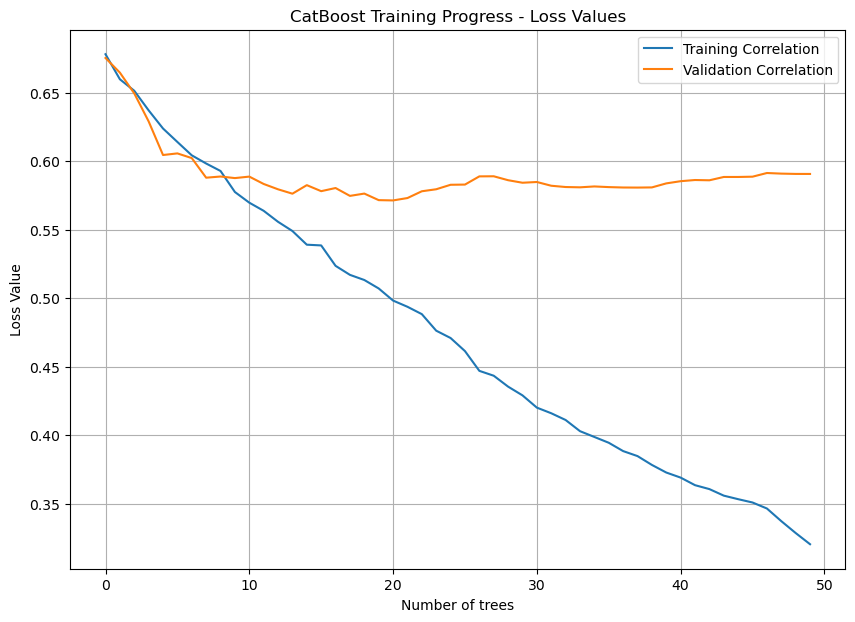

In [16]:
# Publishing the model to the JFrog ML
model = RiskModel()
model.build()

client.build_model(
  model_id='credit_risk',
  prebuilt_qwak_model=model
)